# Genetic algorithm: basics

In [1]:
# Import matplotlib and numpy modules
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Import the Swarm class from NeSSI
from nessi.globopt import Genalg

In [2]:
def peaksF(X, Y):
    F = 3.*(1.-X)*(1.-X)\
                *np.exp(-1.*X**2-(Y+1.)**2)\
                -10.*(X/5.-X**3-Y**5)\
                *np.exp(-1.*X**2-Y**2)\
                -1./3.*np.exp(-1.*(X+1)**2-Y**2)

    return F

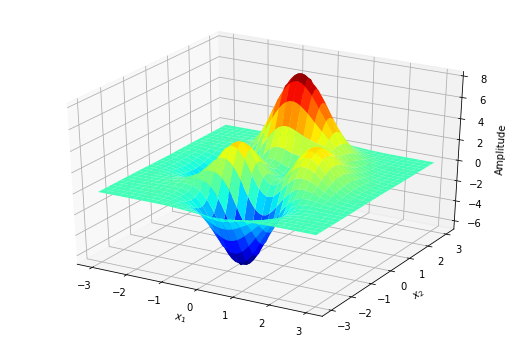

In [3]:
# Initialize 3D plot
fig = plt.figure(figsize=(9,6))
ax = fig.gca(projection='3d')
ax.set_xlabel(r'$x_{1}$')
ax.set_ylabel(r'$x_{2}$')
ax.set_zlabel(r'Amplitude')

# Calculate peak function
X, Y = np.meshgrid(np.linspace(-3, 3, 61), np.linspace(-3, 3, 61))
F = peaksF(X, Y)

# Plot
ax.plot_surface(X, Y, F, vmin=-6.0, vmax=8.0, cmap='jet');

The search-space is delimited by the minimum and maximum values of each parameter (x1 and x2 in this case). The number of sampling (dx) is added.

| x1 min | x1 max | dx1 | x2 min | x2 max | dx2 |
| ------ | ------ | --- | ------ | ------ | --- |
| -3.0   | 3.0    | 32  | -3.0   | 3.0    | 32  |

In [4]:
# Initialize the swarm object
genalg = Genalg()

# PSO parameters
niter = 100
nindv = 20
fit = np.zeros((niter+1, 2), dtype=np.float32)

# Get the search-space
# Alternatively, the search space can be loaded from a text file using the function
#     swarm.init_pspace('name_of_the_file')
# The file must be formatted as follow:
# - one line per point
# - for each line: x1min, x1max, dx1, ..., xNmin, xNmax, dxN
# - comments='#'
# Here, only one point is searched: the one for which the two parameters (X, Y) 
# gives the minimum value of the 2D peak function.
genalg.pspace = np.array([[[-3.0, 3.0, 128],
                          [-3.0, 3.0, 128]]], 
                        dtype=np.float32)

# Initialize particles
genalg.init_chromosome(nindv)

In [5]:
# First evaluation
for indv in range(0, nindv):
    model = genalg.chromoread(genalg.current[indv,:])
    genalg.misfit[indv] = peaksF(model[0, 0], model[0, 1])
fit[0, 0] = np.amin(genalg.misfit)
fit[0, 1] = np.mean(genalg.misfit)

In [6]:
# Loop over generations
for iiter in range(0, niter):
    # Update
    genalg.update(nelit=4)
    # Evaluation
    for indv in range(0, nindv):
        model = genalg.chromoread(genalg.current[indv,:])
        genalg.misfit[indv] = peaksF(model[0, 0], model[0, 1])
    # Store the misfit values
    fit[iiter+1, 0] = np.amin(genalg.misfit)
    fit[iiter+1, 1] = np.mean(genalg.misfit)

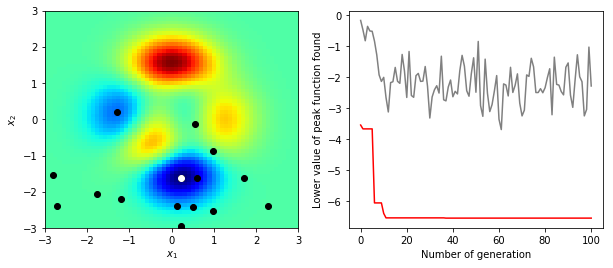

In [7]:
fig = plt.figure(figsize=(10, 4))
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_xlim(-3.0, 3.0)
ax1.set_ylim(-3.0, 3.0)
ax1.set_xlabel(r'$x_{1}$')
ax1.set_ylabel(r'$x_{2}$')
ax1.imshow(F, aspect='auto', cmap='jet', extent=[-3.0, 3.0, -3.0, 3.0], origin='upper-left')
# Loop over individuals
for indv in range(0, nindv):
    model = genalg.chromoread(genalg.current[indv, :])
    ax1.scatter(model[0, 0], model[0, 1], color='black')
ibest = np.argmin(genalg.misfit[:])
model = genalg.chromoread(genalg.current[ibest, :])
ax1.scatter(model[0, 0], model[0, 1], color='white')
ax2 = fig.add_subplot(1, 2, 2)
ax2.set_xlabel('Number of generation')
ax2.set_ylabel('Lower value of peak function found')
ax2.plot(fit[:, 0], color='red')
ax2.plot(fit[:, 1], color='gray');